# 2030ICT/7030ICT
## Introduction to Big Data Analytics
Assignment Specifications Part 1

Group Submission - Louise Howard, Caleb Davis, Mark English



## Section 1 - Data Analysis & Interpretation

Part 1 - Analyse by Comparison

Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:

Sydney and Brisbane

In [1]:
# import all libraries required in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# read in the data from the supplied assignment file and check input via table 
df = pd.read_csv("data_assignment.csv")

In [2]:
df["Date"] = df["Date"].replace(to_replace = r'T.*', value = '', regex = True)
print(f'Column Headers {df.columns}')

Column Headers Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')


In [3]:
Top5Cities = df["Location"].value_counts().index[0:5]
Top5Cities = Top5Cities.tolist()
Top5Cities

['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

In [4]:
City1 = df.loc[df['Location'] == Top5Cities[0]]
City2 = df.loc[df['Location'] == Top5Cities[1]]
City3 = df.loc[df['Location'] == Top5Cities[2]]
City4 = df.loc[df['Location'] == Top5Cities[3]]
City5 = df.loc[df['Location'] == Top5Cities[4]]

In [5]:
# Which city has more jobs? 

selectedCity1 = City1
selectedCity2 = City3

# Count the number of times Sydney is in the data table and assume each is for a job
CityNumber1 = selectedCity1["Location"].value_counts()
# Count the number of times Brisbane is in the data table and assume each is for a job
CityNumber2 = selectedCity2["Location"].value_counts()
print(f'{CityNumber1.index[0]} has {CityNumber1[0]} jobs, while {CityNumber2.index[0]} has {CityNumber2[0]} jobs.')

Sydney has 46357 jobs, while Brisbane has 16538 jobs.


In [6]:
# How many jobs each type (casual, fulltime, etc.) are there in each city?

#Sydney
selectedCity1['JobType'].value_counts()

Full Time          32267
Contract/Temp       8420
Casual/Vacation     2542
Part Time           2277
Name: JobType, dtype: int64

In [7]:
# How many jobs each type (casual, fulltime, etc.) are there in each city?

#Brisbane
selectedCity2['JobType'].value_counts()

Full Time          10431
Contract/Temp       3164
Casual/Vacation     1543
Part Time            988
Name: JobType, dtype: int64

In [8]:
CityJobCount1 = []
for i in range(5):
    CityJobCount1.append((selectedCity1['Classification'].value_counts().index[i], selectedCity1['Classification'].value_counts()[i]))
CityJobCount2 = []
for i in range(5):
    CityJobCount2.append((selectedCity2['Classification'].value_counts().index[i], selectedCity2['Classification'].value_counts()[i]))

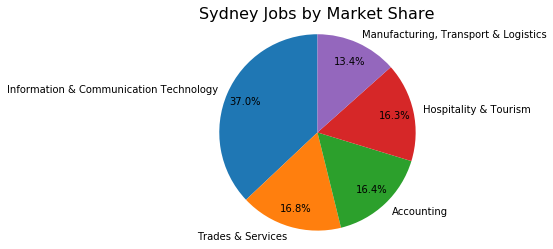

In [9]:
# Visualise the top 5 job sectors in pie chart for each city - Sydney
Labels1 = []
Size1 = []
for i in range(len(CityJobCount1)):
    Labels1.append(CityJobCount1[i][0])
    Size1.append(CityJobCount1[i][1])

# Pie chart for job market share of cities
plt.pie(Size1, labels=Labels1, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'{CityNumber1.index[0]} Jobs by Market Share',size=16,loc='center')
plt.show()

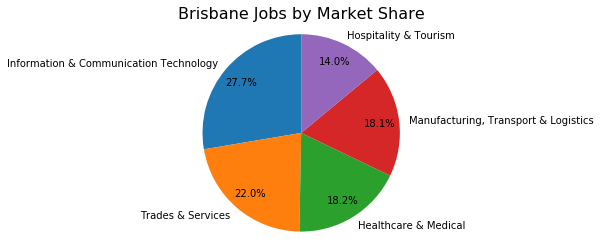

In [10]:
# Visualise the top 5 job sectors in pie chart for each city - Brisbane

Labels2 = []
Size2 = []
for i in range(len(CityJobCount2)):
    Labels2.append(CityJobCount2[i][0])
    Size2.append(CityJobCount2[i][1])

# Pie chart for job market share of cities
plt.pie(Size2, labels=Labels2, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'{CityNumber2.index[0]} Jobs by Market Share',size=16,loc='center')
plt.show()

In [11]:
# In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?
SalRangeA = []
for i in range(len(df['Location'])):
    if df['Location'][i] == CityNumber1.index[0]:
        SalRangeA.append(df['HighestSalary'][i])

SalRangeB = []
for i in range(len(df['Location'])):
    if df['Location'][i] == CityNumber2.index[0]:
        SalRangeB.append(df['HighestSalary'][i])

SalRangeACount = {}
for i in range(len(SalRangeA)):
    if SalRangeA[i] not in SalRangeACount:
        SalRangeACount[SalRangeA[i]] = 1
    else:
        count = SalRangeACount[SalRangeA[i]]
        SalRangeACount[SalRangeA[i]] = count + 1 


SalRangeBCount = {}
for i in range(len(SalRangeB)):
    if SalRangeB[i] not in SalRangeBCount:
        SalRangeBCount[SalRangeB[i]] = 1
    else:
        count = SalRangeBCount[SalRangeB[i]]
        SalRangeBCount[SalRangeB[i]] = count + 1 


Sydney has salary ranges of {30: 8427, 40: 3035, 50: 4406, 60: 3751, 70: 4152, 80: 3850, 100: 3702, 120: 4330, 150: 4228, 200: 4718, 250: 1758}


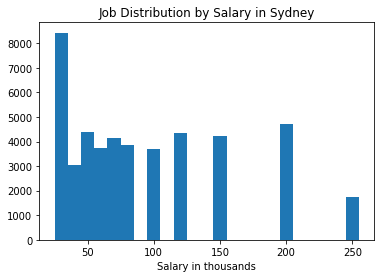

In [12]:
print(f'{CityNumber1.index[0]} has salary ranges of {SalRangeACount}')


CityA = SalRangeACount.keys()
Citya = SalRangeACount.values()

plt.bar(CityA, Citya, width = 10)
plt.title(f'Job Distribution by Salary in {CityNumber1.index[0]}')
plt.xlabel('Salary in thousands')
plt.show()

Brisbane has salary ranges of {30: 2962, 40: 1192, 50: 2271, 60: 1481, 70: 1611, 80: 1384, 100: 1317, 120: 1494, 150: 1076, 200: 1202, 250: 548}


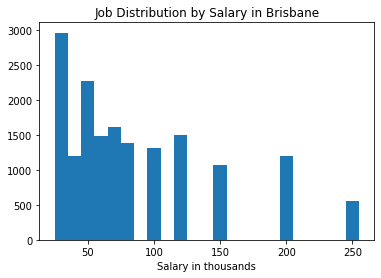

In [13]:
print(f'{CityNumber2.index[0]} has salary ranges of {SalRangeBCount}')


CityB = SalRangeBCount.keys()
Cityb = SalRangeBCount.values()

plt.bar(CityB, Cityb, width = 10)
plt.title(f'Job Distribution by Salary in {CityNumber2.index[0]}')
plt.xlabel('Salary in thousands')
plt.show()

In [14]:
# In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid? (1 point)
# Sydney has both a higher number of jobs and the graph shows a larger proportion of sydney jobs are in those higher brackets that in brisbane


In [15]:
# List top 5 companies in each city? Which sectors do they belong to?

#Sydney Companies
Top5Companies1 = selectedCity1["Company"].value_counts().index[0:5]
Top5Companies1 = Top5Companies1.tolist()
print(Top5Companies1)
#Brisbane Companies
Top5Companies2 = selectedCity2["Company"].value_counts().index[0:5]
Top5Companies2 = Top5Companies2.tolist()
print(Top5Companies2)
selectedCity2["Company"].value_counts()[0:5]

['Jora Local', 'Robert Walters', 'Design & Build', 'Bluefin Resources Pty Limited', 'Paxus']
['Jora Local', 'u&u. Recruitment Partners', 'Hudson', 'The University of Queensland', 'Programmed Skilled Workforce']


Jora Local                      238
u&u. Recruitment Partners       191
Hudson                          187
The University of Queensland    180
Programmed Skilled Workforce    171
Name: Company, dtype: int64

In [16]:
def ClassCount(Location):
    return Location['Classification'].value_counts()[0:3] # change the 3 to see more sectors

In [17]:
# Top 3 Job sectors per company
print(f'Top 5 Companies in {CityNumber1.index[0]} \n')
for i in range(5):
    print(Top5Companies1[i])
    City1Comp = selectedCity1.loc[selectedCity1['Company'] == Top5Companies1[i]]
    print(ClassCount(City1Comp), end = '\n \n')
print(f'Top 5 Companies in {CityNumber2.index[0]} \n')
for j in range(5):
    print(Top5Companies2[j])
    City2Comp = selectedCity2.loc[selectedCity2['Company'] == Top5Companies2[j]]
    print(ClassCount(City2Comp), end = '\n \n')

Top 5 Companies in Sydney 

Jora Local
Hospitality & Tourism         1398
Trades & Services               15
Retail & Consumer Products      13
Name: Classification, dtype: int64
 
Robert Walters
Information & Communication Technology    196
Accounting                                 75
Banking & Financial Services               64
Name: Classification, dtype: int64
 
Design & Build
Construction              234
Real Estate & Property     64
Trades & Services          29
Name: Classification, dtype: int64
 
Bluefin Resources Pty Limited
Information & Communication Technology    82
Banking & Financial Services              76
Marketing & Communications                21
Name: Classification, dtype: int64
 
Paxus
Information & Communication Technology    231
Administration & Office Support             6
Accounting                                  4
Name: Classification, dtype: int64
 
Top 5 Companies in Brisbane 

Jora Local
Hospitality & Tourism         235
Trades & Services            

In [18]:
# Between 2 cities, which do you think it is better for employees. Explain your choice

Part 2 - Analyse by Time

In [19]:
#extra stuff needed before we continue

months = [0,31,29,31,30,31,30,31,31,30,31,30,31]
DayOfTheWeek = {'Sunday': 0, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0}
dates = df['Date'].value_counts()
Dates = []
for i in range(len(dates)):
    Dates.append(dates.index[i])

for j in range(len(Dates)):
    ThisDate = Dates[j].split('-')
    Dates[j] = ThisDate[1:3]

def xToDay(x):
    if (x == 0):
        return 'Sunday'
    elif (x == 1):
        return 'Monday'
    elif (x == 2):
        return 'Tuesday'
    elif (x == 3):
        return 'Wednesday'
    elif (x == 4):
        return 'Thursday'
    elif (x == 5):
        return 'Friday'
    elif (x == 6):
        return 'Saturday'

In [20]:
Dates

[['10', '17'],
 ['10', '31'],
 ['10', '04'],
 ['10', '10'],
 ['10', '30'],
 ['10', '18'],
 ['11', '05'],
 ['11', '07'],
 ['10', '09'],
 ['10', '16'],
 ['10', '19'],
 ['11', '12'],
 ['10', '05'],
 ['10', '15'],
 ['10', '08'],
 ['10', '03'],
 ['10', '29'],
 ['11', '06'],
 ['11', '09'],
 ['11', '02'],
 ['10', '02'],
 ['10', '26'],
 ['10', '12'],
 ['11', '01'],
 ['10', '11'],
 ['10', '25'],
 ['11', '08'],
 ['10', '21'],
 ['10', '07'],
 ['10', '01'],
 ['11', '13'],
 ['10', '24'],
 ['10', '23'],
 ['11', '10'],
 ['10', '22'],
 ['11', '04'],
 ['11', '03'],
 ['10', '06'],
 ['10', '20'],
 ['11', '11'],
 ['10', '28'],
 ['10', '14'],
 ['10', '27'],
 ['10', '13']]

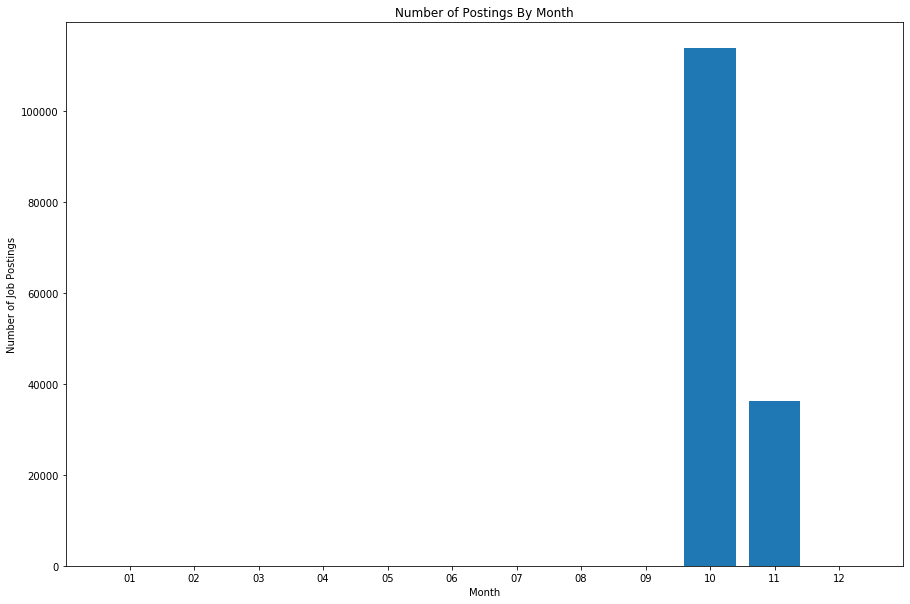

In [21]:
# Visualise the number of job posts by month. (Graph)
MonthOfYear = {'01': 0,'02': 0,'03': 0,'04': 0,'05': 0,'06': 0,'07': 0,'08': 0,'09': 0,'10': 0,'11': 0,'12': 0}
for i in range(len(Dates)):
    # store counter to dictionary
    MonthOfYear[Dates[i][0]] = int(MonthOfYear[Dates[i][0]]) + dates[i]

plt.figure(figsize=(15,10))
plt.title('Number of Postings By Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
Yaxis = MonthOfYear.values()
Xaxis = MonthOfYear.keys()
plt.bar(Xaxis, Yaxis, align = 'center')
plt.show()

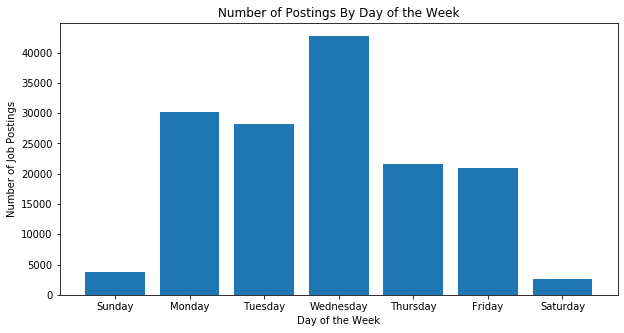

In [22]:
# Visualise the number of job posts by day of week (Graph)
x = int
for i in range(len(Dates)):
    # Find day of the week
    if (Dates[i][0] == '10'):
        x = int(Dates[i][1]) % 7 
    elif (Dates[i][0] == '11'): 
        x = (int(Dates[i][1]) + 31) % 7 
    # store counter to dictionary
    DayOfTheWeek[xToDay(x)] = DayOfTheWeek[xToDay(x)] + dates[i]
#DayOfTheWeek
plt.figure(figsize=(10,5))
plt.title('Number of Postings By Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Job Postings')
Yaxis = DayOfTheWeek.values()
Xaxis = DayOfTheWeek.keys()
plt.bar(Xaxis, Yaxis, align = 'center')
plt.show()

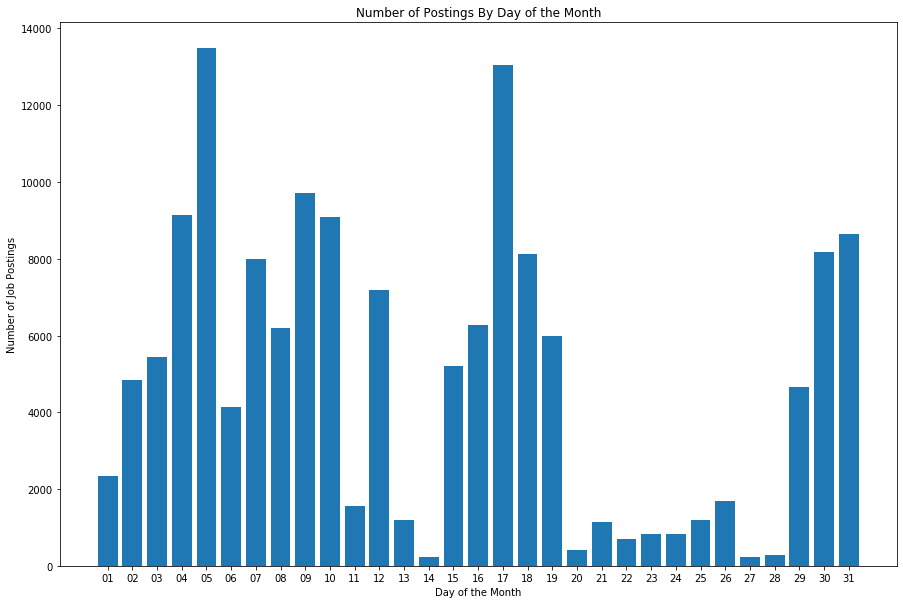

In [23]:
# Visualise the number of job posts by day of the month. (Graph)
DayOfTheMonth = {'01': 0,'02': 0,'03': 0,'04': 0,'05': 0,'06': 0,'07': 0,'08': 0,'09': 0,'10': 0,'11': 0,'12': 0,'13': 0,'14': 0,'15': 0,'16': 0,'17': 0,'18': 0,'19': 0,'20': 0,'21': 0,'22': 0,'23': 0,'24': 0,'25': 0,'26': 0,'27': 0,'28': 0,'29': 0,'30': 0, '31': 0}
x = int
for i in range(len(Dates)):
    # store counter to dictionary
    DayOfTheMonth[Dates[i][1]] = int(DayOfTheMonth[Dates[i][1]]) + dates[i]
#DayOfTheMonth
plt.figure(figsize=(15,10))
plt.title('Number of Postings By Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Job Postings')
Yaxis = DayOfTheMonth.values()
Xaxis = DayOfTheMonth.keys()
plt.bar(Xaxis, Yaxis, align = 'center')
plt.show()

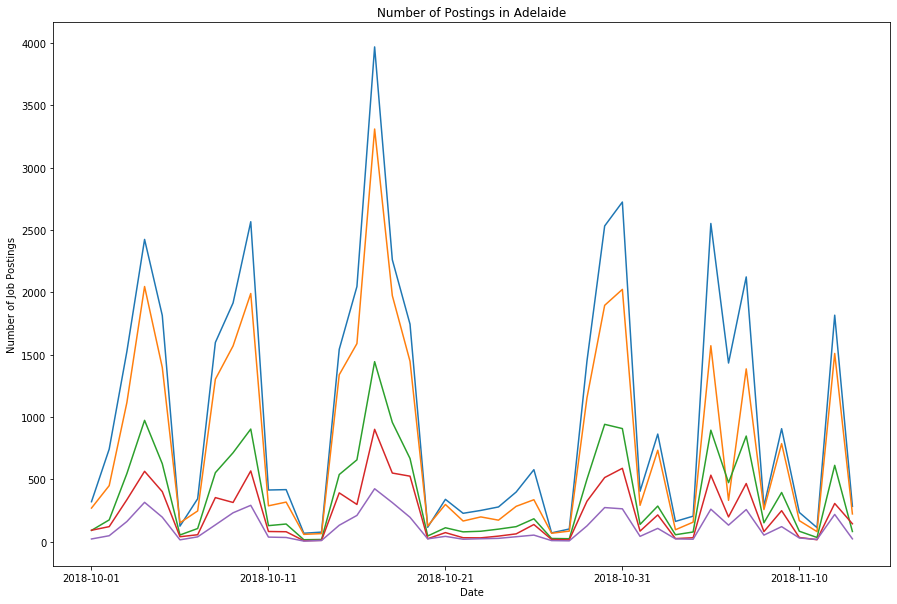

In [24]:
# Visualise trending of the job postings for the big cities (Graph)
#2nd for loop for each selcity
City1Date = City1['Date'].value_counts().sort_index()
City2Date = City2['Date'].value_counts().sort_index()
City3Date = City3['Date'].value_counts().sort_index()
City4Date = City4['Date'].value_counts().sort_index()
City5Date = City5['Date'].value_counts().sort_index()
CityNo = [City1Date, City2Date, City3Date, City4Date, City5Date]
plt.figure(figsize=(15,10))
for i in range(5):    
    plt.title(f'Number of Postings The Top Five Cities')
    plt.xlabel('Date')
    plt.ylabel('Number of Job Postings')
    CityNo[i].plot(kind='line')
plt.show()

In [25]:
BrisbaneHighPay = City3.loc[City3['LowestSalary'] >= 80]

In [26]:
BrisJobCount = []
for i in range(5):
    BrisJobCount.append((BrisbaneHighPay['Classification'].value_counts().index[i], BrisbaneHighPay['Classification'].value_counts()[i]))

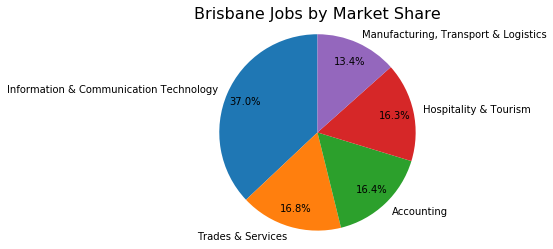

In [27]:
# Visualise the top 5 job sectors in pie chart for each city - Sydney
Labels = []
Size = []
for i in range(len(BrisJobCount)):
    Labels.append(BrisJobCount[i][0])
    Size.append(BrisJobCount[i][1])

# Pie chart for job market share of cities
plt.pie(Size1, labels=Labels1, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Brisbane Jobs by Market Share',size=16,loc='center')
plt.show()


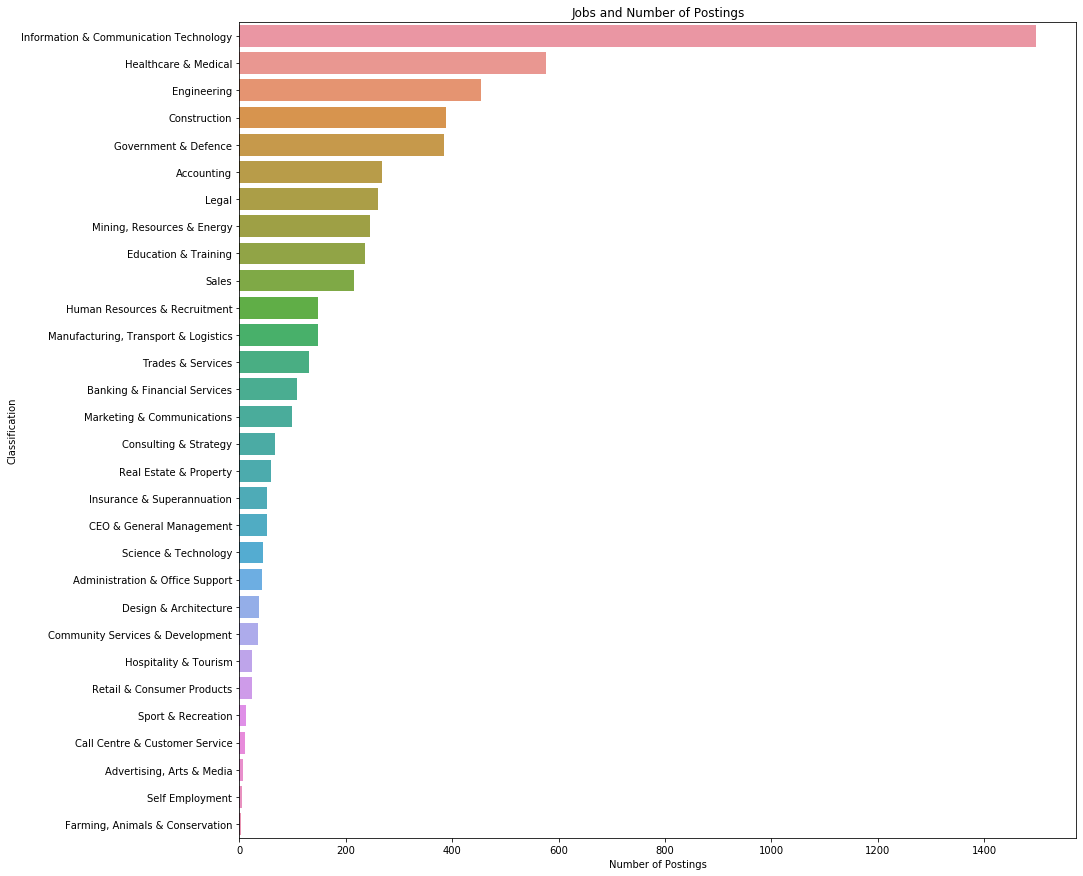

In [28]:
plt.figure(figsize=(15,15))
sns.countplot(y='Classification',data=BrisbaneHighPay,order=BrisbaneHighPay.Classification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()

In [38]:
Top5JobSec = BrisbaneHighPay['Classification'].value_counts().index[0:5]
Top5JobSec = Top5JobSec.tolist()
Top5JobSec
Sec1 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[0]]
Sec2 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[1]]
Sec3 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[2]]
Sec4 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[3]]
Sec5 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[4]]

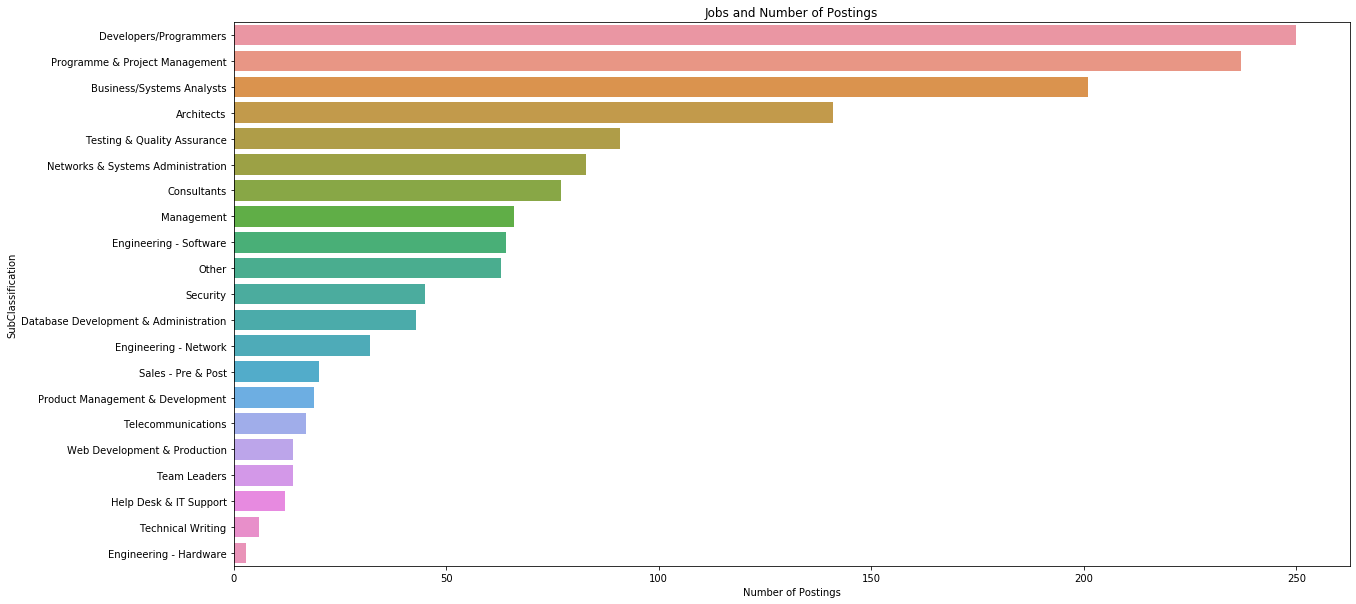

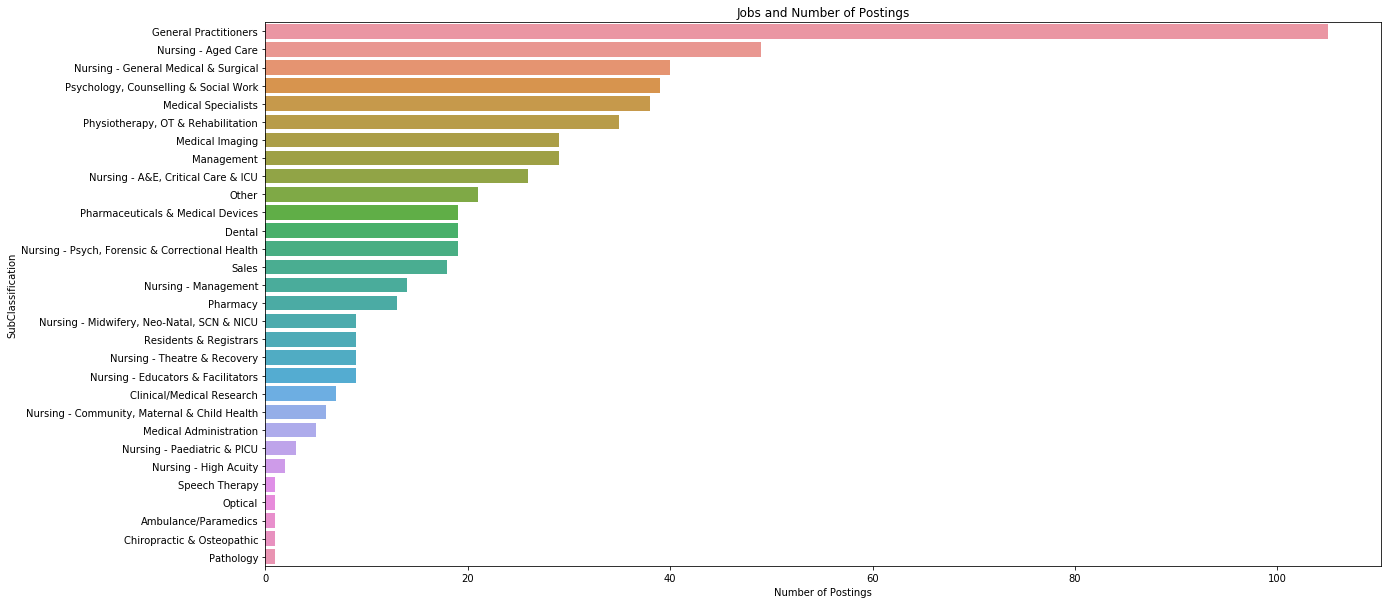

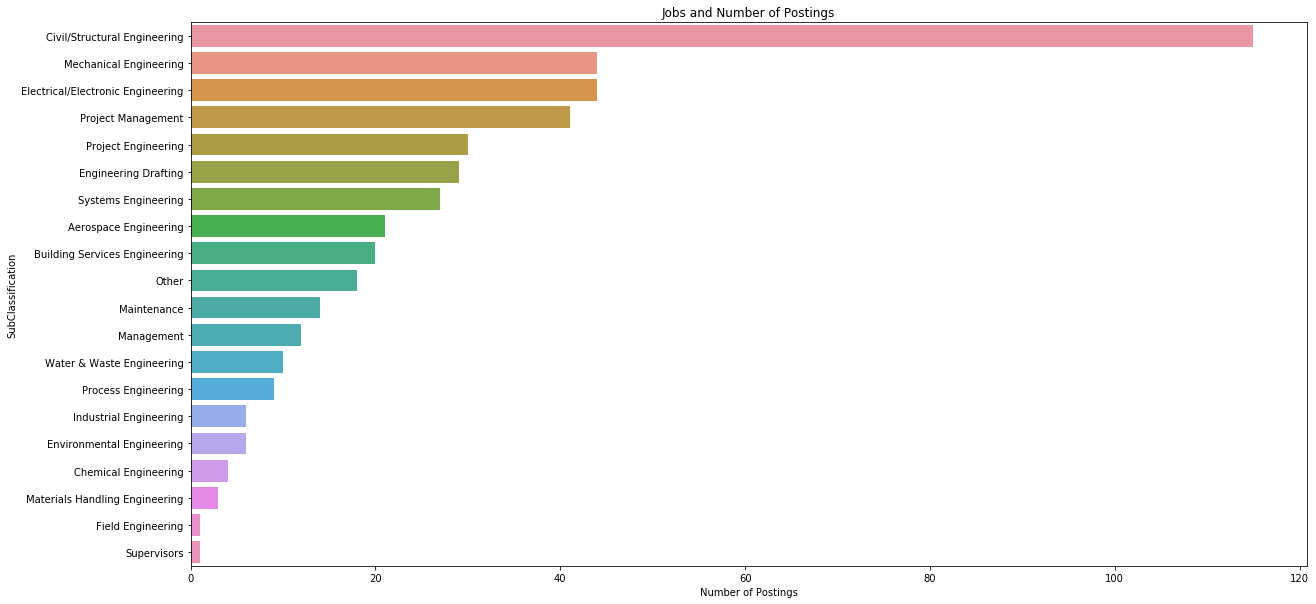

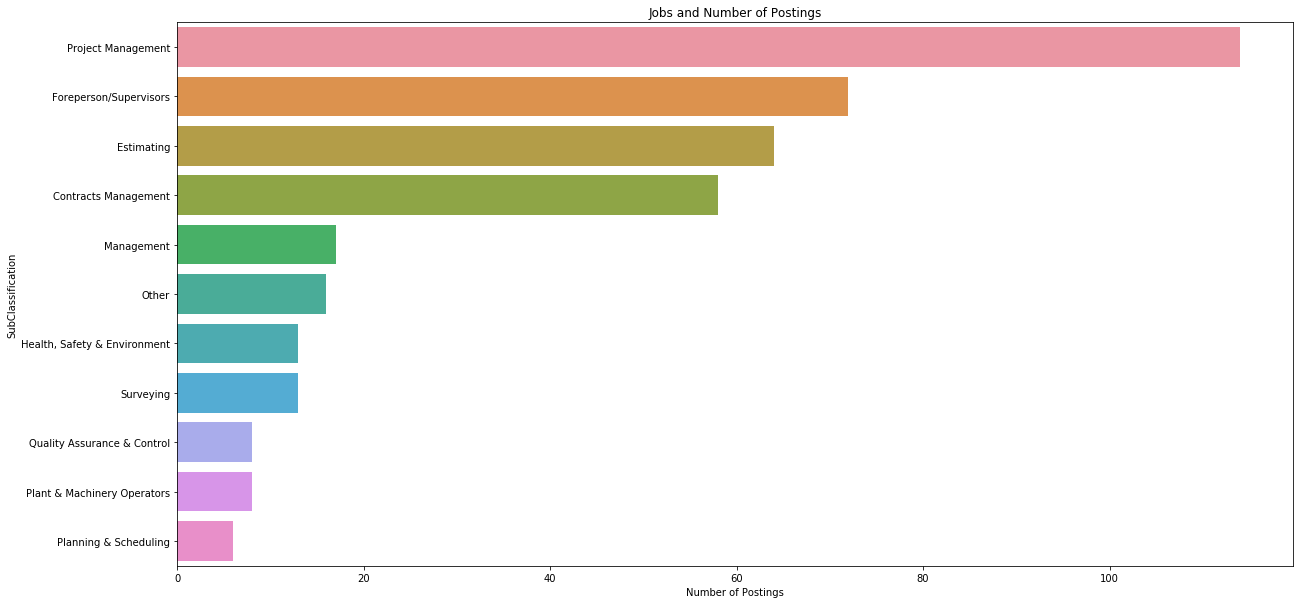

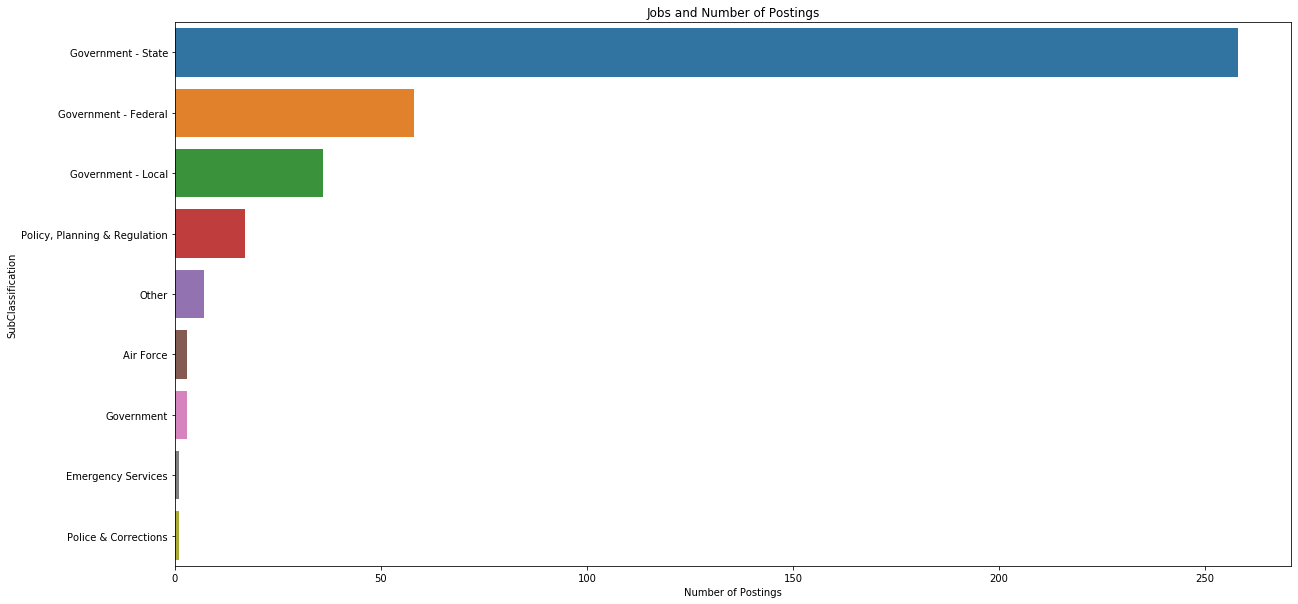

In [51]:
plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec1,order=Sec1.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec2,order=Sec2.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec3,order=Sec3.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec4,order=Sec4.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec5,order=Sec5.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()

Part 3 - Forecasting and skill extractions

In [31]:
# Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart
# Which one creates a better prediction

In [32]:
# Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. 
# Visualise them in word cloud # chart (hint: you can use the online tool https://wordart.com/create or similar websites

Section 2 - Discussion